In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1. Measuring Technical Error in Input Measurements

This is the first in the series of the development of the input-output model. If you have not read the README.md, please go back as I will not be recovering information.

## Get Started

Let's get started. What will follow are a series of modules which will walk through the development of the model, step-by-step. With detailed documentation, hopefully future users will be able to pass their own data through the model, compare it to historical data, and refine the model for future use.

### About This Notebook

In this notebook, I will be documenting my comparisons between my data gathered and that gathered by a second source. I will do this comparison for the two inputs which were conducted over the course of the project:
1. Stage V Gametocytemia Measurements
2. Percent Exflagellation Measurements

We can use this to find trends within each data set as opposed to building the model on the datasets themselves. Hopefully by measuring the trends within the data collected by each technician then measuring the differences between technicians, we can control and avoid error introduced by the technician into the model.

Some conventions: I will be reading the data into the file as pandas.DataFrames then will convert them to numpy arrays. I will run mathematical operations on the numpy arrays, then visualize them as matplotlib plots. This is just personal preference, so feel free to build according to your own preferences.

## 1. Stage V Gametocytemia Measurements

Stage V Gametocytemia is a meaurement of the percent of mature gametocytes in a population of cells on a giemsa smear. We measure gametocytemia through the following steps: (*eventually write out methods here*)

Each function will be described in comments around the function. We will begin by reading in the data and formatting it for analysis. Please download your data as a .csv file and follow the steps below.

In [7]:
# This function takes a file containing gametocytemia data formatted accordingly
# and it returns tuple of arrays
def read_csv_gametocytemia_data(filename):
    gams_data = pd.read_csv(filename) # read csv into pandas DataFrame
    
    # Produce arrays for each of the columns containing gams data. Each col should be from a different source
    gams_source1 = gams_data['gams_source1'].to_numpy()
    gams_source2 = gams_data['gams_source2'].to_numpy()
    # gams_source3 = gams_data['gams_source3'].to_numpy()
    # gams_source4 = ...
    
    # Produce arrays of age and codenames for each of the measurements from each of the sources
    gams_age = gams_data['gams_age'].to_numpy()
    gams_codenames = gams_data['codenames'].to_numpy()
    
    # Return these arrays in a tuple
    return gams_age, gams_codenames, gams_source1, gams_source2 #, gams_source3...

Now that we have a function for reading in our data. In the next cell, we will get the arrays so we can operate on them throughout the rest of the notebook. Notice how we receive the data: ```gams_age, gams_codenames, *gams_sources```. This is called **unpacking**, and the last term is particularly important. ```*gams_sources``` unpacks all of our *gams_sourceN* into its own tuple. Later, we will be able to call *gams_sources* to loop through all of our source data arrays.

In [8]:
# Saves outputs as an age of gams array, a codename array, and tuple of measurement arrays of N length (N = number of sources) 

FILENAME = "../../data/p1_gametocytemia_measurement_trends.csv" # Set the path to your file here
gams_age, gams_codenames, *gams_sources = read_csv_gametocytemia_data(filename=FILENAME) # Run function here

Now, lets measure each of the gams data arrays before we compare them to each other. We can do this by measuring the mean and standard deviation. We can also build a probability distribution function to visualize how each of the measurements from a given source may vary by day. We must separate the measurements by day (a.k.a. how old the gametocytes are) because we suspect that gametocytemia is dependent on the age of the gametocytes.

Links for Graphing, Probability, and Analysis
* [Normalizing Data](https://developers.google.com/machine-learning/data-prep/transform/normalization)

This is the first step in understanding gametocytemia. As our measurements we're taken on gametocytes at different ages, how did their ages affect the percent gametocytemia yielded? Let's find out:

In [11]:
# TODO: function which calculates the mean and standard deviation to return a regression model for the gams data array
# the regressions should probably take the same equation format with varying constants and scalars.
def calculate_mean_and_std_for_gams(gams_arr, gams_age):
    gams_means_and_stds = {}
    ages = set(gams_age.flat)
    for age in ages:
        gams_at_this_age = gams_arr[gams_age == age]
        gams_mean = gams_at_this_age.mean()
        gams_std = gams_at_this_age.std()
        gams_means_and_stds[age] = {"mean": gams_mean, "std": gams_std}
    return pd.DataFrame.from_dict(gams_means_and_stds, orient='index')

In [ ]:
def generate_pdf_for_gams(gams_sourceN, mu, sigma):
    # TODO: Normalize the data to account for error between sources: x' = (x - mu) / sigma
    # TODO: Plot Normalized data against its probability in the dataset. Do this per age of gams.
    pass

From there, we will build a regression around each of the arrays.
If the trends within each gams data array (i.e. across observers) are the same, then we should expect our regressions to be similar between the arrays. Let's look:

In [18]:
def generate_regression_for_gams(gams_arr, gams_means_and_stds):
    constants = {} # a dictionary where the constant's name in the regression is key and the value is value
    scalars = {} # a dictionary where the scalar's name in the regression is key and the value is value
    return constants, scalars

# TODO: compare the constants and scalars across the regression models. Maybe we can plot these differences
# Ideally, we would want N-large number of observers on the same codenames to measure this variation
def distribution_of_regressions_for_gams(list_of_regressions):
    # TODO: generate a distribution of the regressions constants and scalars
    # to measure variation between them
    pass

# TODO: run a qualitative analysis of the regressions of the input data

Now that we've defined our equations, lets iterate through the data arrays with them,

In [ ]:
# Run code here

In [47]:
def create_scatter_plot(x_axis, y_axis, title, x, ys):
    fig, ax = plt.subplots()
    
    for y in ys:
        ax.scatter(x, y.values(), label=y.keys())
        
    plt.xlabel(x_axis) #set x axis label
    plt.ylabel(y_axis) #set y axis label
    plt.title(title)
    
    ax.legend()
    ax.grid(True)
    plt.show

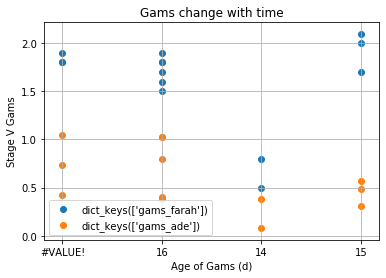

In [48]:
ys = []
for label in ["gams_farah", "gams_ade"]:
    ys.append({label: list(df[label])})

create_scatter_plot(
    x_axis="Age of Gams (d)", 
    y_axis="Stage V Gams", 
    title="Gams change with time", 
    x=df["age_of_gams"],
    ys=ys
)